<a href="https://colab.research.google.com/github/JurugoBrian/internship_text_analysis/blob/main/internship_text_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<strong>Name:</strong> Anyanzo Ivan Brian <br>
<strong>Student No:</strong> 2000717674 <br>
<strong>Registration No:</strong> 2020/HD05/17674U <br>
<strong>Course:</strong> Master of Science in Computer Science

In [1]:
# Importing necessary library
from __future__ import division
import pandas as pd
import numpy as np
import os, os.path
import re, random
from google.colab import drive
import nltk
from nltk.corpus import stopwords
import time
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud # for generating word clouds

<strong>Step 1: Load the dataset</strong>

In [2]:
#Load google drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [3]:
# Specifying the path to the internship comments dat
internship_comments = '/content/drive/MyDrive//colab_notebooks/internship_comments.xlsx'
# Display the first and last five comments
df = pd.read_excel(internship_comments)
df

,comment_id,Comment
0,5,djfjkdfjkjkffdk edited
1,41,Faith has exhibited enthusiasm in taking on th...
2,49,He now has now understood the structure of gra...
3,50,The Intern was oriented on ICT setup and Infra...
4,52,The student was oriented on the organization s...
...,...,...
3909,7963,Intern managed to set up a monitoring tool on ...
3910,7967,This was impressive work. The intern opened gr...
3911,7968,The week went well. Students had a background ...
3912,7969,It was best to attach the intern to an actual ...


In [4]:
# Get more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3914 entries, 0 to 3913
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   comment_id  3914 non-null   int64 
 1   Comment     3913 non-null   object
dtypes: int64(1), object(1)
memory usage: 61.3+ KB


In [5]:
# drop null records incase they exist
df = df.dropna()
df

,comment_id,Comment
0,5,djfjkdfjkjkffdk edited
1,41,Faith has exhibited enthusiasm in taking on th...
2,49,He now has now understood the structure of gra...
3,50,The Intern was oriented on ICT setup and Infra...
4,52,The student was oriented on the organization s...
...,...,...
3909,7963,Intern managed to set up a monitoring tool on ...
3910,7967,This was impressive work. The intern opened gr...
3911,7968,The week went well. Students had a background ...
3912,7969,It was best to attach the intern to an actual ...


In [6]:
# Drop the first row with dummy data
df = df.drop([0])
df

,comment_id,Comment
1,41,Faith has exhibited enthusiasm in taking on th...
2,49,He now has now understood the structure of gra...
3,50,The Intern was oriented on ICT setup and Infra...
4,52,The student was oriented on the organization s...
5,53,Activities well completed
...,...,...
3909,7963,Intern managed to set up a monitoring tool on ...
3910,7967,This was impressive work. The intern opened gr...
3911,7968,The week went well. Students had a background ...
3912,7969,It was best to attach the intern to an actual ...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3912 entries, 1 to 3913
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   comment_id  3912 non-null   int64 
 1   Comment     3912 non-null   object
dtypes: int64(1), object(1)
memory usage: 91.7+ KB


<strong>Step 2: Create a custome corpus</strong>

In [8]:
# Pick the comment_id column of the pandas dataframe and convert it to a list
id_df = df.iloc[:, 0]
id_list = id_df.values.tolist()
id_list

[41,
 49,
 50,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 63,
 65,
 66,
 68,
 71,
 80,
 85,
 88,
 96,
 97,
 99,
 100,
 102,
 120,
 124,
 126,
 142,
 144,
 147,
 148,
 149,
 160,
 168,
 220,
 225,
 231,
 236,
 252,
 253,
 259,
 263,
 264,
 265,
 281,
 283,
 284,
 285,
 286,
 287,
 288,
 290,
 291,
 293,
 296,
 299,
 302,
 309,
 310,
 311,
 312,
 313,
 314,
 315,
 317,
 318,
 319,
 320,
 321,
 322,
 323,
 324,
 328,
 329,
 330,
 331,
 332,
 333,
 334,
 335,
 336,
 341,
 342,
 343,
 345,
 346,
 347,
 348,
 360,
 361,
 363,
 364,
 365,
 366,
 378,
 379,
 380,
 381,
 382,
 383,
 384,
 385,
 386,
 387,
 388,
 389,
 390,
 391,
 392,
 393,
 394,
 399,
 400,
 401,
 402,
 403,
 404,
 406,
 407,
 408,
 414,
 415,
 416,
 417,
 418,
 422,
 423,
 437,
 438,
 439,
 445,
 453,
 455,
 456,
 457,
 458,
 469,
 470,
 471,
 472,
 473,
 474,
 475,
 476,
 477,
 478,
 479,
 482,
 493,
 499,
 501,
 510,
 520,
 526,
 528,
 529,
 530,
 531,
 535,
 565,
 568,
 569,
 570,
 573,
 574,
 575,
 578,
 586,
 587,
 589,
 590,
 

In [9]:
# Pick the comment column of the pandas dataframe and convert it to a list
comment_df = df.iloc[:, 1]
comment_list = comment_df.values.tolist()
comment_list

['Faith has exhibited enthusiasm in taking on the project at hand. She has already shown promising signs in understanding the core concepts of software engineering. I look forward discovering more as time goes on.',
 "He now has now understood the structure of grails and how different components relate. Understands the process of getting API's from MTN",
 'The Intern was oriented on ICT setup and Infrastructure of Soroti University, drafted workplan and started off the Internship. Simon was encouraged to take the Internship seriously as there was a lot to learn.',
 'The student was oriented on the organization structure, developed workplan for the 4 week internship and participated in assessment of printers for servicing.  He acquired both technical and teamwork skills at workplace.',
 'Activities well completed',
 'finished on time',
 "The student's weekly progress was justifiably good, characterized with enthusiasm to learning more.",
 'Noted',
 'She found this very interesting as sh

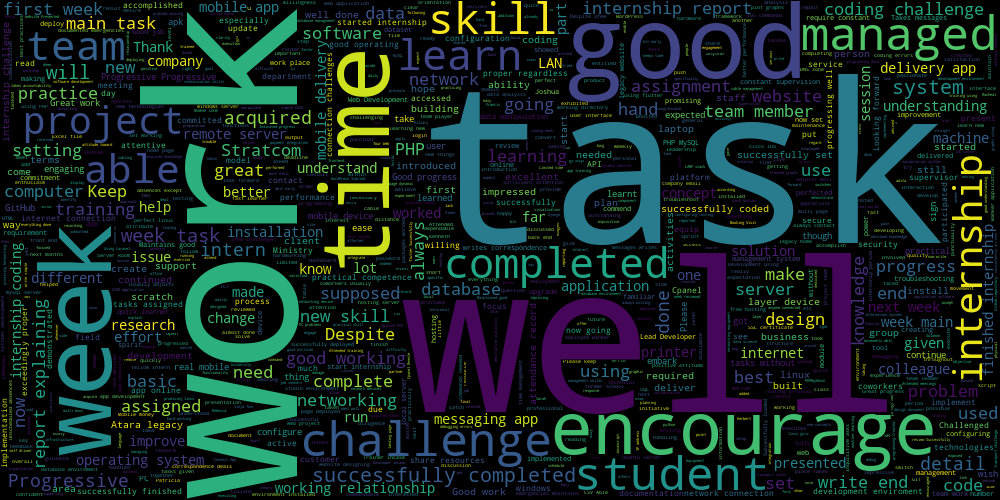

In [10]:
# Create a WordCloud object of the current corpus
comment_string = " ".join(comment_list)
wordcloud = WordCloud(background_color="black", max_words=5000, contour_width=3, contour_color='steelblue',width=1000,height=500)

# Generate a word cloud
wordcloud.generate(comment_string)

# Visualize the word cloud
wordcloud.to_image()

In [11]:
# Create a comment dictionary with id_list as keys and comment_list as values
comment_dictionary = dict(zip(id_list, comment_list))

In [12]:
# Create a corpus directory and store in it the comment dictionary
path = os.path.expanduser('~/nltk_data')

# checking
if not os.path.exists(path):
    os.mkdir(path)
    print ("Does path exists : ", os.path.exists(path))

import nltk.data
print ("\nDoes path exists in nltk : ", path in nltk.data.path)

with open(path + 'comment_dictionary.pickle', 'wb') as handle:
    pickle.dump(comment_dictionary, handle)


Does path exists in nltk :  True


<strong>Step 3: Clean internship comments to keep only letters and remove stopwords</strong>

In [13]:
# Print some of the comments in the internship corpus created:
with open(path + 'comment_dictionary.pickle', 'rb') as handle:
    comment_dictionary = pickle.load(handle)

In [14]:
print (comment_dictionary[3670])

Loy was very supportive during the restoration of systems at TASO Entebbe Centre  but it was also an advantage on her side that she got to see and interact with  a number of operations during restoration of systems and services.


In [15]:
print (comment_dictionary[5417])

He designed the word challenge software in Javascript
https://practice.boostedtechs.com/word_search/
His approach to the problem is convincing


In [16]:
print (comment_dictionary[160])

Maintains good working relationships with coworkers.
Has a good attendance record.
Error rate is acceptable, and all work is completed timely.


In [17]:
# Initialize Porter Stemmer and lemmatizer library from nltk

lemmatizer = WordNetLemmatizer()
pst = PorterStemmer()

In [18]:
# Clean the comments to keep only letters. Remove stopwords using NLTK and sklearn

def clean_comment(raw_comments):
    """
    Function to clean internship comments to keep only letters and remove stopwords
    Returns a string of the cleaned internship comments
    """
    letters_only = re.sub('[^a-zA-Z]', ' ', raw_comments)
    words = letters_only.lower().split()
    stopwords_eng = set(stopwords.words("english"))
    
    useful_words = [x for x in words if not x in stopwords_eng]
    
        
    # Combine words into a paragraph again
    useful_words_string = ' '.join(useful_words)
     # Stem the string
    stemmed_words = pst.stem(useful_words_string)
    # Lemmatized string
    lemmatized_words = lemmatizer.lemmatize(stemmed_words)
    
    return(lemmatized_words)

comment_list_clean = map(clean_comment, comment_list)
comment_clean_dictionary = dict(zip(id_list, comment_list_clean))

with open(path + 'comment_clean_dictionary.pickle', 'wb') as handle:
    pickle.dump(comment_clean_dictionary, handle)

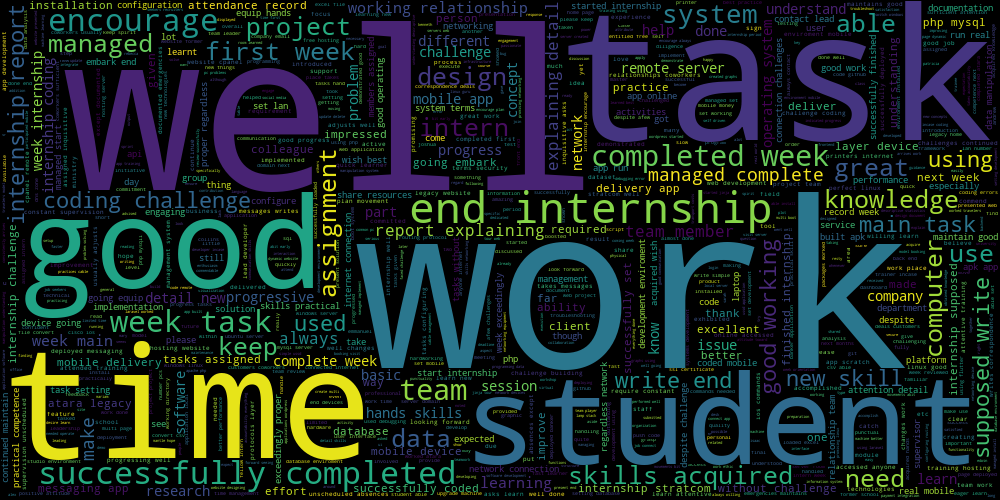

In [19]:
# Word cloud of the cleaned dataset
comment_string_clean = ''.join(str(e) for e in comment_list)
comment_string_clean = clean_comment(comment_string_clean)

wordcloud = WordCloud(background_color="black", max_words=5000, contour_width=3, contour_color='steelblue',width=1000,height=500)

# Generate a word cloud
wordcloud.generate(comment_string_clean)

# Visualize the word cloud
wordcloud.to_image()

In [20]:
# Print some of the comments in the internship corpus cleaned:
with open(path + 'comment_clean_dictionary.pickle', 'rb') as handle:
    comment_clean_dictionary = pickle.load(handle)

In [21]:
print(comment_clean_dictionary[3670])

loy supportive restoration systems taso entebbe centre also advantage side got see interact number operations restoration systems servic


In [22]:
print (comment_clean_dictionary[5417])

designed word challenge software javascript https practice boostedtechs com word search approach problem convinc


In [23]:
print(comment_clean_dictionary[160])

maintains good working relationships coworkers good attendance record error rate acceptable work completed tim


<strong>Step 4: Calculating TF-IDF vectors of the comments</strong>

In [24]:
with open(path + 'comment_clean_dictionary.pickle', 'rb') as handle:
    comment_clean_dictionary = pickle.load(handle)

# Stem the comments
stemmer = PorterStemmer()

def stem_words(words_list, stemmer):
    return [stemmer.stem(word) for word in words_list]

# Tokenize the comments
def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = stem_words(tokens, stemmer)
    return stems

tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words='english')
tfs = tfidf.fit_transform(comment_clean_dictionary.values())

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  % sorted(

In [25]:
tfs

<3912x3071 sparse matrix of type '<class 'numpy.float64'>'
	with 40451 stored elements in Compressed Sparse Row format>

In [26]:
# Save the TF-IDF matrix
from scipy.sparse import csr_matrix

def save_sparse_csr(filename,array):
    np.savez(filename,data = array.data ,indices=array.indices,
             indptr =array.indptr, shape=array.shape )

def load_sparse_csr(filename):
    loader = np.load(filename)
    return csr_matrix((loader['data'], loader['indices'], loader['indptr']),
                         shape = loader['shape'])

In [27]:
save_sparse_csr(path + 'internship_comments_tf_idf.npz', tfs)

<strong>Step 5: Find the a comments 5 Nearest Neighbors with cosine distance</strong>

In [28]:
from sklearn.neighbors import NearestNeighbors

model_tf_idf = NearestNeighbors(metric='cosine', algorithm='brute')
model_tf_idf.fit(tfs)

NearestNeighbors(algorithm='brute', metric='cosine')

In [29]:
# A function to print the k nearest neighbors for any given internship comment. 

def print_nearest_neighbors(query_tf_idf, full_internship_comment_dictionary, knn_model, k):
    """
    Inputs: a query tf_idf vector, the dictionary of internship comments, the knn model, and the number of neighbors
    Prints the k nearest neighbors
    """
    distances, indices = knn_model.kneighbors(query_tf_idf, n_neighbors = k+1)
    nearest_neighbors = [list(full_internship_comment_dictionary.values())[x] for x in indices.flatten()]
    
    for comment in range(len(nearest_neighbors)):
        if comment == 0:
            print ('Query Comment: {0}\n'.format(nearest_neighbors[comment]))
        else:
            print ('{0}: {1}\n'.format(comment, nearest_neighbors[comment]))

In [30]:
test_comment1 = np.random.choice(tfs.shape[0])
print_nearest_neighbors(tfs[test_comment1], comment_clean_dictionary, model_tf_idf, k=5)

Query Comment: website published client invited start using content management system ecommerce website asked client note bugs fix timothy progressed well internship able notice following abilities personal initiative grasps complex concepts ability simplify codeble solutions leadership abilities somewhat rigid needs improve believe bright future given correct mentor ship great engin

1: initial testing bugs detected student demonstrated ability read errors bugs plus ability debug

2: timothy completed ecommerce system integrated website payment system well client invited come presentation minimum viable website prototype presented client happy prototype expected introduced new features part original design tasked timothy discuss additions client able fruitful discussion client resulted two new additional features namely adding submission form adding image video sect

3: deploying website bugs noticed client contacted us resolved discussed details come specifics inform solutions allowe

In [31]:
test_comment2 = np.random.choice(tfs.shape[0])
print_nearest_neighbors(tfs[test_comment2], comment_clean_dictionary, model_tf_idf, k=5)

Query Comment: active tasks avail

1: activities well complet

2: student easily avail

3: always available office work

4: active practical student paid clear attention demonstration wireless security administration availing devic

5: actively particip



<strong>Step 6: K-Means to cluster comments into: Excellent, Good, Neutral, Poor, and Very Poor.</strong>

In [32]:
tfs = load_sparse_csr(path + 'internship_comments_tf_idf.npz')

In [33]:
# Initialize the KMeans class from sklearn.cluster as km and fit tf-idf matrix tfs to the KMeans instance.

from sklearn.cluster import KMeans

k = 5 
km = KMeans(n_clusters=k, init='k-means++', max_iter=30, n_init=5, verbose=1)
km.fit(tfs)

Initialization complete
Iteration 0, inertia 6810.574140987625
Iteration 1, inertia 3588.5907587355327
Iteration 2, inertia 3555.276587830226
Iteration 3, inertia 3542.633093663345
Iteration 4, inertia 3539.8942721649073
Iteration 5, inertia 3538.1480219648956
Iteration 6, inertia 3536.358749354602
Iteration 7, inertia 3535.9382522446604
Iteration 8, inertia 3535.6204485274984
Iteration 9, inertia 3535.5127864500087
Iteration 10, inertia 3535.452470135798
Iteration 11, inertia 3535.4366251033143
Iteration 12, inertia 3535.424704273979
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 6705.6198297411065
Iteration 1, inertia 3597.109685369581
Iteration 2, inertia 3559.226507216357
Iteration 3, inertia 3538.4533382254085
Iteration 4, inertia 3527.1131212225273
Iteration 5, inertia 3518.5751027824326
Iteration 6, inertia 3514.148405777705
Iteration 7, inertia 3512.2660886690996
Iteration 8, inertia 3510.9590440292814
Iteration 9, inertia 3510.25682

KMeans(max_iter=30, n_clusters=5, n_init=5, verbose=1)

<strong>Step 7: Distribution of the clusters</strong>

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

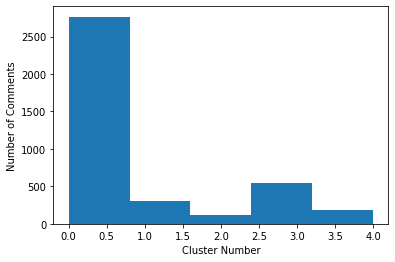

In [35]:
# Plotting histograms of cluster type vs Numbers in each cluster
plt.hist(km.labels_, bins=k)
plt.xlabel("Cluster Number")
plt.ylabel("Number of Comments")
plt.show()

In [36]:
# Assign comments to their respective clusters by creating a dictionary with the 
# clusters as keys and the comments assigned to their respective clusters as values.

In [37]:
with open(path + 'comment_clean_dictionary.pickle', 'rb') as handle:
    comment_clean_dictionary = pickle.load(handle)

In [38]:
cluster_assignments_dict = {}

for i in set(km.labels_):
    #print i
    current_cluster_comments = [list(comment_clean_dictionary.values())[x] for x in np.where(km.labels_ == i)[0]]
    cluster_assignments_dict[i] = current_cluster_comments

In [39]:
cluster_pick = np.random.choice(len(set(km.labels_)))
print('Cluster {0}'.format(cluster_pick))
cluster_assignments_dict[cluster_pick]

Cluster 2


['louisa almost done end internship challeng',
 'sign mary supposed present end internship coding challenge well far',
 'sign alex present solution end internship challeng',
 'sign davis present solution end internship challeng',
 'sign collins supposed present solution internship coding challeng',
 'sign mariam present solution end internship challeng',
 'sign norah present solution end internship challeng',
 'sign dauglas present solution end internship coding challeng',
 'sign warid present solution end internship challeng',
 'sign daniel supposed code present end internship coding challenge coding jobconnect app scratch app link job seekers recruit',
 'moses successfully coded presented end internship challenge coding multi page dynamic website former school supposed write end internship report explaining detail new skills acquir',
 'sign jackson present solution end internship challeng',
 'ian started coding end internship challenge sign present app',
 'almost done internship chal

In [40]:
cluster_pick = np.random.choice(len(set(km.labels_)))
print('Cluster {0}'.format(cluster_pick))
cluster_assignments_dict[cluster_pick]

Cluster 2


['louisa almost done end internship challeng',
 'sign mary supposed present end internship coding challenge well far',
 'sign alex present solution end internship challeng',
 'sign davis present solution end internship challeng',
 'sign collins supposed present solution internship coding challeng',
 'sign mariam present solution end internship challeng',
 'sign norah present solution end internship challeng',
 'sign dauglas present solution end internship coding challeng',
 'sign warid present solution end internship challeng',
 'sign daniel supposed code present end internship coding challenge coding jobconnect app scratch app link job seekers recruit',
 'moses successfully coded presented end internship challenge coding multi page dynamic website former school supposed write end internship report explaining detail new skills acquir',
 'sign jackson present solution end internship challeng',
 'ian started coding end internship challenge sign present app',
 'almost done internship chal

In [41]:
cluster_pick = np.random.choice(len(set(km.labels_)))
print('Cluster {0}'.format(cluster_pick))
cluster_assignments_dict[cluster_pick]

Cluster 3


['activities well complet',
 'activity took time completed completed satisfact',
 'noted tasks complet',
 'bug fixes task finally completed report submitted reviewed task say good progress',
 'completed satisfact',
 'completed satisfact',
 'completed satisfact',
 'successfully finished task',
 'checked complet',
 'checked complet',
 'good progress quick learner positive able complete assigned tasks required time period despite difficulty internet connect',
 'quick learner completed task meant acceptance criteria improve speed completing many tasks possible week improve team work',
 'tasks complet',
 'tasks well complet',
 'successful week tasks work ysave member system improve appl',
 'tasks completed time instruct',
 'completed task meant acceptance criteria completed within minimal time fram',
 'tasks assignments well completed good interaction lesson',
 'task complet',
 'well complet',
 'able complete demo tasks assigned excellent performance devop',
 'completed task meant acceptanc

In [42]:
cluster_pick = np.random.choice(len(set(km.labels_)))
print('Cluster {0}'.format(cluster_pick))
cluster_assignments_dict[cluster_pick]

Cluster 1


['good knowledge whole process instal',
 'good attitude resilience good start',
 'good progress expect student work together period',
 'good time keeper much interest network',
 'maintains good working relationships coworkers good attendance record error rate acceptable work completed tim',
 'week good development momentum issu',
 'good attempt great enthusiasm',
 'able identify different parts computer good',
 'good start research need',
 'good attitude towards challenges willingness learn well don',
 'catching well contributes asks questions know good work don',
 'tasks well done good work',
 'good work stud',
 'good attitude enthusiasm',
 'good resilience traits team work',
 'new nevertheless managed implement aspect talked good work don',
 'good work',
 'serious hardworking able make research things done good work',
 'idea wireless networks practice become good',
 'good attitude amidst challenges well don',
 'assignments well done good team work skil',
 'good attempt practice resea

In [43]:
cluster_pick = np.random.choice(len(set(km.labels_)))
print('Cluster {0}'.format(cluster_pick))
cluster_assignments_dict[cluster_pick]

Cluster 3


['activities well complet',
 'activity took time completed completed satisfact',
 'noted tasks complet',
 'bug fixes task finally completed report submitted reviewed task say good progress',
 'completed satisfact',
 'completed satisfact',
 'completed satisfact',
 'successfully finished task',
 'checked complet',
 'checked complet',
 'good progress quick learner positive able complete assigned tasks required time period despite difficulty internet connect',
 'quick learner completed task meant acceptance criteria improve speed completing many tasks possible week improve team work',
 'tasks complet',
 'tasks well complet',
 'successful week tasks work ysave member system improve appl',
 'tasks completed time instruct',
 'completed task meant acceptance criteria completed within minimal time fram',
 'tasks assignments well completed good interaction lesson',
 'task complet',
 'well complet',
 'able complete demo tasks assigned excellent performance devop',
 'completed task meant acceptanc

In [44]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

In [45]:
# Visualizing the comments as TF-IDF Vectors using t-SNE
k = 5
tfs_reduced = TruncatedSVD(n_components=k, random_state=0).fit_transform(tfs)

In [46]:
# Printing the first comments' representation in both spaces.
print (tfs[0].A)
print ('\n')
print (tfs_reduced[0])

[[0. 0. 0. ... 0. 0. 0.]]


[ 0.01315032  0.07185403  0.00433143  0.02486638 -0.03784055]


In [47]:
# Finding a 2-D representation of our 5-dimensional tensor using t-SNE.
tfs_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(tfs_reduced)
print (tfs_embedded.shape)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3912 samples in 0.014s...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 3912 samples in 0.211s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3912
[t-SNE] Computed conditional probabilities for sample 2000 / 3912
[t-SNE] Computed conditional probabilities for sample 3000 / 3912
[t-SNE] Computed conditional probabilities for sample 3912 / 3912
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 0.389s
[t-SNE] Iteration 50: error = 76.3423920, gradient norm = 0.0435997 (50 iterations in 2.227s)
[t-SNE] Iteration 100: error = 66.9417114, gradient norm = 0.0097683 (50 iterations in 1.839s)
[t-SNE] Iteration 150: error = 65.6185760, gradient norm = 0.0031943 (50 iterations in 1.772s)
[t-SNE] Iteration 200: error = 65.1660309, gradient norm = 0.0027899 (50 iterations in 1.647s)
[t-SNE] Iteration 250: error = 64.9381790, gradient norm = 0.0015379 (50 iterations in 1.686s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.938179
[t-SNE] Iteration 300: error = 1.2987146, gra

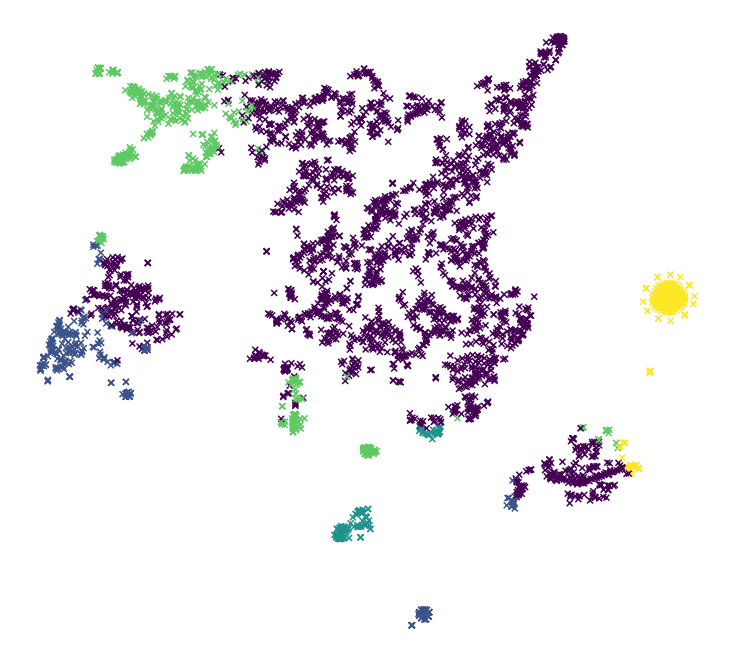

In [48]:
# Plot the comments' colored according to their k-means cluster assignment.
fig = plt.figure(figsize=(10, 10))
plt.title("Distribution of comments by internship supervisors")
ax = plt.axes(frameon=False)
plt.setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
plt.scatter(tfs_embedded[:, 0], tfs_embedded[:, 1], marker="x", c = km.labels_)
plt.show()

<strong>Step 8: Named Entity Recognition model</strong>

In [49]:
sentence = "Ivan is a second year student persuing a Master of Computer Science Degree. He joined Makerere University in the year 2020 and currently lives in Entebbe"

# Tokenize the sentence
for sent in nltk.sent_tokenize(sentence):
    # Find parts of speech and chunk words
    for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
        if hasattr(chunk, 'label'):
            print(chunk.label(), ' '.join(c[0] for c in chunk))

PERSON Ivan
ORGANIZATION Computer Science Degree
ORGANIZATION Makerere University
GPE Entebbe
